# Setup

In [6]:
import numpy as np
from joblib import load
from sklearn.metrics import mean_absolute_error

# Load Test Data and Trained Models

In [4]:
X_test = np.load('../data/X_test.npy')
X_test_all_indices = np.load('../data/X_test_all_indices.npy')
X_test_selected_indices = np.load('../data/X_test_selected_indices.npy')
y_test = np.load('../data/y_test.npy')

In [15]:
linear_regression_10_bands = load('../models/linear_regression_10_bands.joblib')
linear_regression_all_bands = load('../models/linear_regression_all_bands.joblib')
linear_regression_selected_bands = load('../models/linear_regression_selected_bands.joblib')
knn_10_bands = load('../models/knn_10_bands.joblib')
knn_all_bands = load('../models/knn_all_bands.joblib')
knn_selected_bands = load('../models/knn_selected_bands.joblib')
decision_tree_10_bands = load('../models/decision_tree_10_bands.joblib')
decision_tree_all_bands = load('../models/decision_tree_all_bands.joblib')
decision_tree_selected_bands = load('../models/decision_tree_selected_bands.joblib')
random_forest = load('../models/random_forest.joblib')
extra_trees = load('../models/extra_trees.joblib')
xgboost = load('../models/xgboost.joblib')
# mlp = load('../models/mlp.joblib') # TODO!
# cnn = load('../models/cnn.joblib') # TODO!

## Compute the Predictions and Mean Absolute Error

In [19]:
y_pred_linear_regression_10_bands = linear_regression_10_bands.predict(X_test)
y_pred_linear_regreesion_all_bands = linear_regression_all_bands.predict(X_test_all_indices)
y_pred_linear_regression_selected_bands = linear_regression_selected_bands.predict(X_test_selected_indices)
y_pred_knn_10_bands = knn_10_bands.predict(X_test)
y_pred_knn_all_bands = knn_all_bands.predict(X_test_all_indices)
y_pred_knn_selected_bands = knn_selected_bands.predict(X_test_selected_indices)
y_pred_decision_tree_10_bands = decision_tree_10_bands.predict(X_test)
y_pred_decision_tree_all_bands = decision_tree_all_bands.predict(X_test_all_indices)
y_pred_decision_tree_selected_bands = decision_tree_selected_bands.predict(X_test_selected_indices)
y_pred_random_forest = random_forest.predict(X_test_all_indices)
y_pred_extra_trees = extra_trees.predict(X_test_all_indices)
y_pred_xgboost = xgboost.predict(X_test_all_indices)

In [61]:
error = np.zeros(12)
label = [''] * 12
error[0] = mean_absolute_error(y_test, y_pred_linear_regression_10_bands)
label[0] = 'Linear Regression (10 bands)'
error[1] = mean_absolute_error(y_test, y_pred_linear_regreesion_all_bands)
label[1] = 'Linear Regression (all bands)'
error[2] = mean_absolute_error(y_test, y_pred_linear_regression_selected_bands)
label[2] = 'Linear Regression (selected bands)'
error[3] = mean_absolute_error(y_test, y_pred_knn_10_bands)
label[3] = 'KNN (10 bands)'
error[4] = mean_absolute_error(y_test, y_pred_knn_all_bands)
label[4] = 'KNN (all bands)'
error[5] = mean_absolute_error(y_test, y_pred_knn_selected_bands)
label[5] = 'KNN (selected bands)'
error[6] = mean_absolute_error(y_test, y_pred_decision_tree_10_bands)
label[6] = 'Decision Tree (10 bands)'
error[7] = mean_absolute_error(y_test, y_pred_decision_tree_all_bands)
label[7] = 'Decision Tree (all bands)'
error[8] = mean_absolute_error(y_test, y_pred_decision_tree_selected_bands)
label[8] = 'Decision Tree (selected bands)'
error[9] = mean_absolute_error(y_test, y_pred_random_forest)
label[9] = 'Random Forest'
error[10] = mean_absolute_error(y_test, y_pred_extra_trees)
label[10] = 'Extra Trees'
error[11] = mean_absolute_error(y_test, y_pred_xgboost)
label[11] = 'XGBoost'

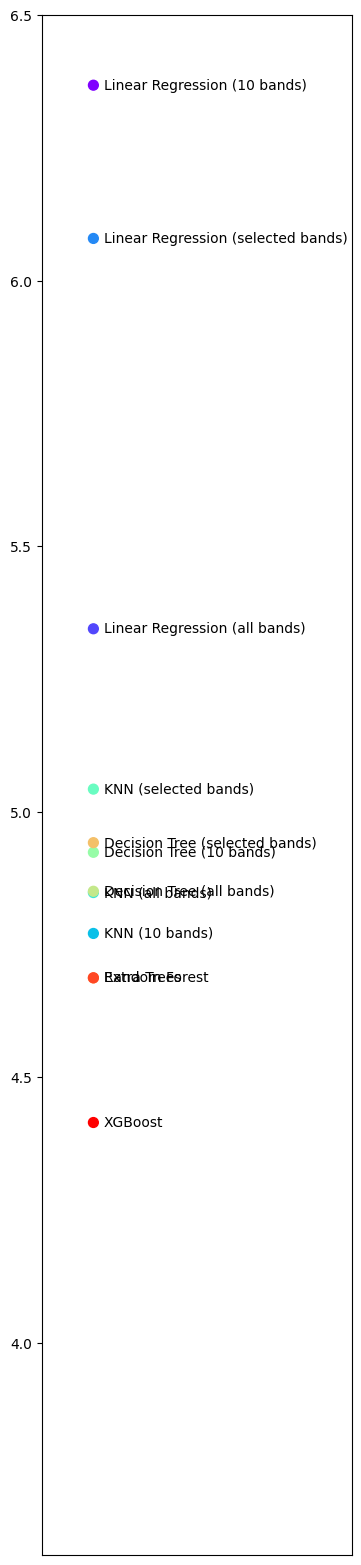

In [81]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(4, 20))

colors = cm.rainbow(np.linspace(0, 1, len(error)))

# Plotting the error values
ax.scatter([0] * len(error), error, c=colors, s=50)

# Annotating the points with labels
for i, txt in enumerate(label):
    ax.annotate(txt, (0.2, error[i]), va='center')

plt.xlim(-1, 5)
plt.ylim(3.6, 6.5)

ax.xaxis.set_visible(False)

plt.show()

TypeError: 'numpy.float64' object is not iterable

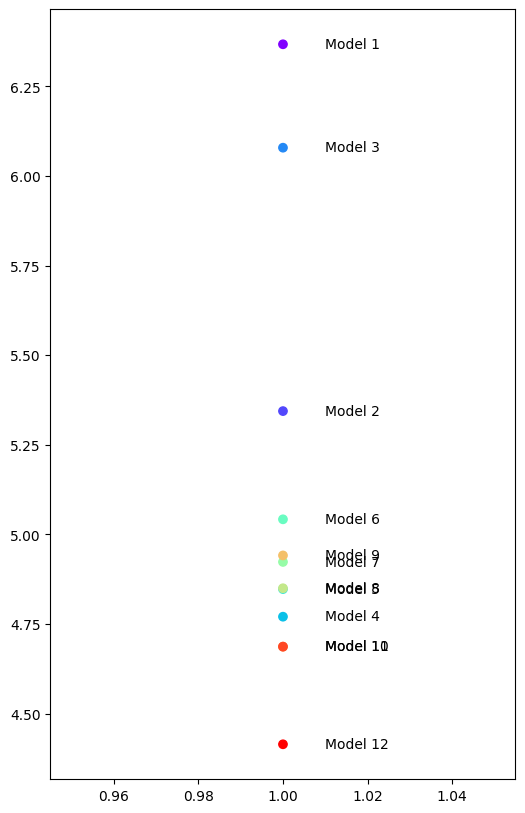

In [53]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Using a colormap to assign colors based on y-values

# Creating a scatter plot
plt.figure(figsize=(6, 10))
plt.scatter([1]*len(error), error, c=colors)

# Annotating points with their labels

plt.yticks(np.arange(min(error), max(error), 0.1))
plt.title('Model Errors')
plt.xlabel('Model Index')
plt.ylabel('Error')
plt.show()
